<a href="https://colab.research.google.com/github/BrainsCorp/Data-Science-Stuff/blob/master/PCA/HRX_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study_Human Resourse Dataset

* <b>Human_Resources.csv<b/> Analysis
* Apply K mean Clustering
* Apply PCA
* Apply Autoencoder

#### Task 1:Import your libraries

In [ ]:
#Import the libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
#Attach the Human_Resource.csv file and view the first five records
hrx = pd.read_csv('Human_Resources.csv', header='infer', sep=',')
print(hrx.shape)
hrx.head(5)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# show all the file data types
hrx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# objects
hrx.select_dtypes(include=['object']).apply([pd.Series.nunique, pd.Series.unique], axis=0)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
nunique,2,3,3,6,2,9,3,1,2
unique,"[Yes, No]","[Travel_Rarely, Travel_Frequently, Non-Travel]","[Sales, Research & Development, Human Resources]","[Life Sciences, Other, Medical, Marketing, Tec...","[Female, Male]","[Sales Executive, Research Scientist, Laborato...","[Single, Married, Divorced]",[Y],"[Yes, No]"


In [ ]:
# Show the following basic statistics
hrx.select_dtypes(include=[np.number]).describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Task 2:VISUALIZE DATASET

In [ ]:
hrx['Over18'].unique() # this feature has only one value : should be removed

array(['Y'], dtype=object)

In [ ]:
hrx['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
hrx['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Replace 'Attritition','Overtime' and 'Over18' columns with integers before performing any visualizations
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hrx['Attrition'] = le.fit_transform(hrx['Attrition'])
hrx['OverTime'] = le.fit_transform(hrx['OverTime'])
hrx['Over18'] = le.fit_transform(hrx['Over18'])

hrx[['Attrition','OverTime','Over18']].head()

,Attrition,OverTime,Over18
0,1,1,0
1,0,0,0
2,1,1,0
3,0,1,0
4,0,0,0


In [ ]:
# display the current first four records
hrx.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [ ]:
# Drop EmployeeNumber',EmployeeCount' ,'Standardhours' and 'Over18' since they do not change from one employee to the other
drop_cols = ['EmployeeNumber', 'EmployeeCount' ,'StandardHours', 'Over18']

for col in drop_cols:
  if col in  list(hrx.columns):
    hrx.drop(labels=col, axis=1, inplace=True)
  else:
    print(f'Columns not Found!: {col}')

print('HRX Columns')
print(hrx.columns)
print(hrx.shape)

HRX Columns
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
(1470, 31)


In [ ]:
# Let's see how many employees left the company!
left_df  = hrx[hrx['Attrition'] == 1]
stayed_df  = hrx[hrx['Attrition'] == 0]
print(left_df.shape)
print(stayed_df.shape)

(237, 31)
(1233, 31)


In [ ]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset
print(f"Total Employees: {hrx['Attrition'].count()}")
print(f"Employees who left: {len(left_df)}")
print(f"Employees who stayed: {len(stayed_df)}")

Total Employees: 1470
Employees who left: 237
Employees who stayed: 1233


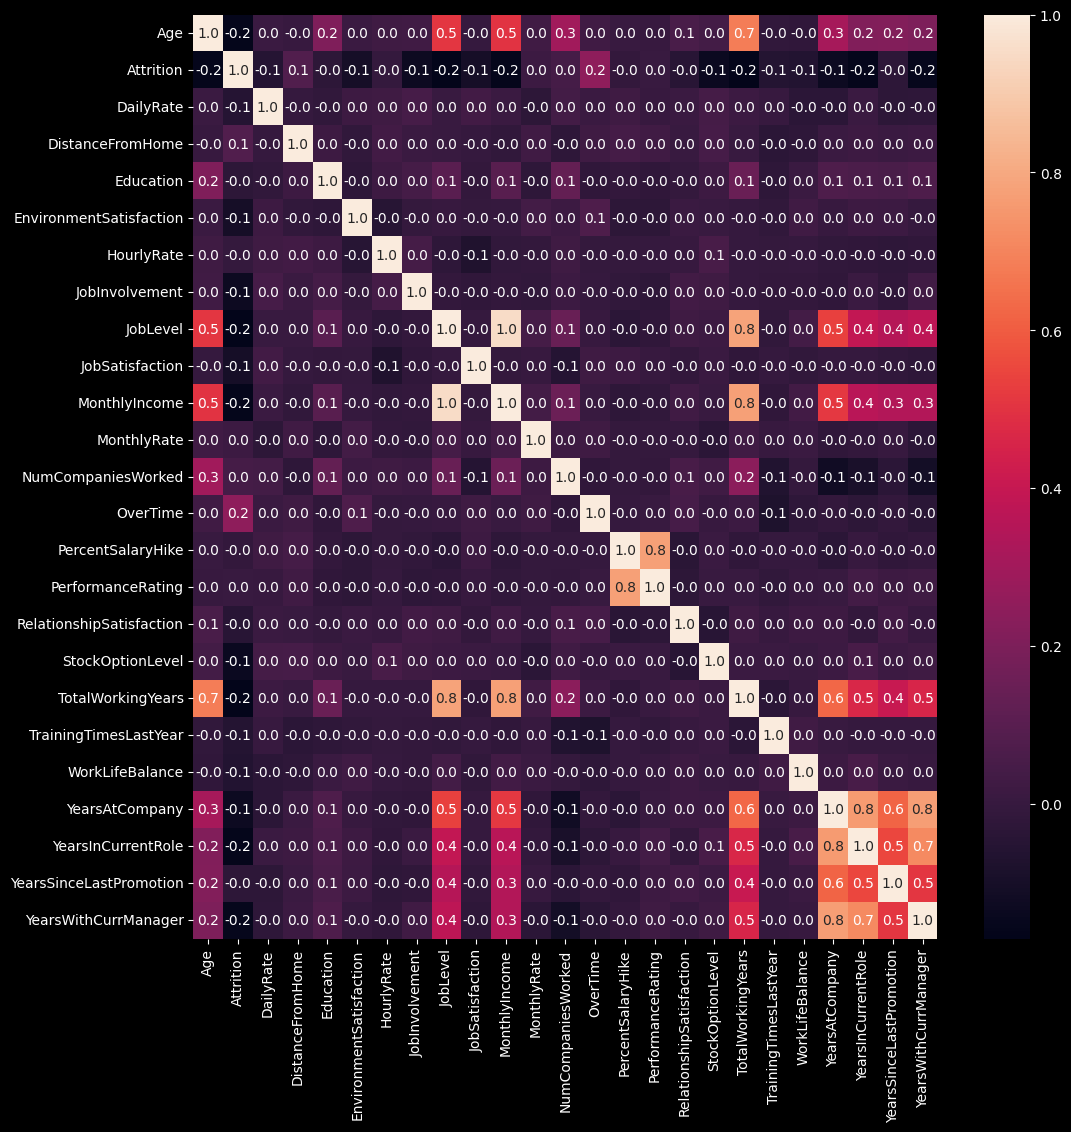

In [ ]:
# show the correlation heat map as below
plt.figure(figsize=(12,12))
sns.heatmap(hrx.corr(numeric_only=True), annot=True, fmt='1.1f')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


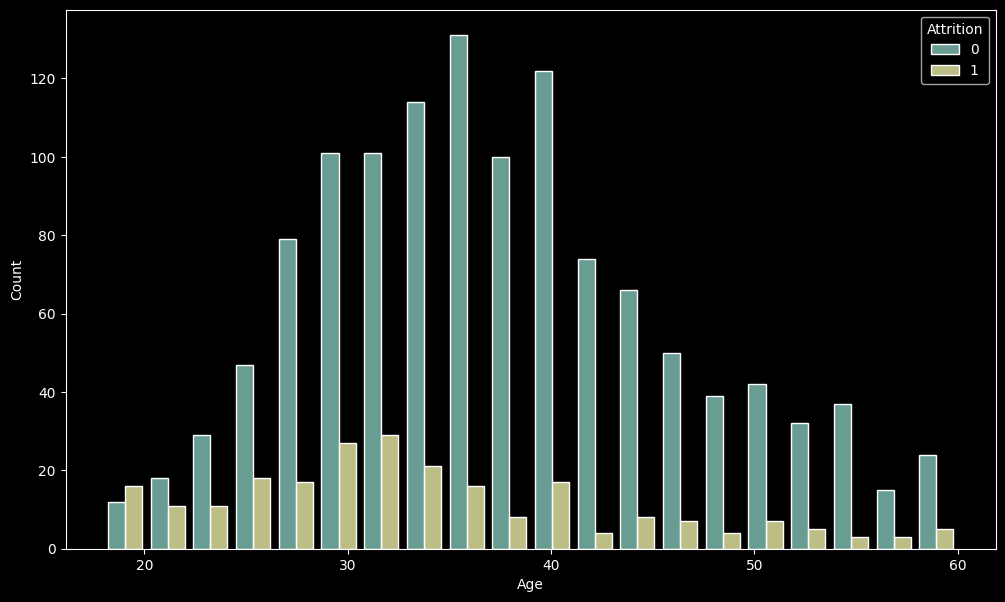

In [ ]:
# Display the below visualization with hue as Attrition
plt.figure(figsize=(12,7))
sns.histplot(data=hrx, x='Age', hue='Attrition', multiple='dodge', bins=20, shrink=0.8)
plt.show()

In [ ]:
display(stayed_df['Age'].describe())
display(left_df['Age'].describe())

,Age
count,1233.000000
mean,37.561233
std,8.888360
min,18.000000
25%,31.000000
50%,36.000000
75%,43.000000
max,60.000000


,Age
count,237.000000
mean,33.607595
std,9.689350
min,18.000000
25%,28.000000
50%,32.000000
75%,39.000000
max,58.000000


### Interpetation:
1. 50 % of the workforce is less than 36 years that stayed with the company.
1. 50 % of the workforce who left the company was less than 32 years.

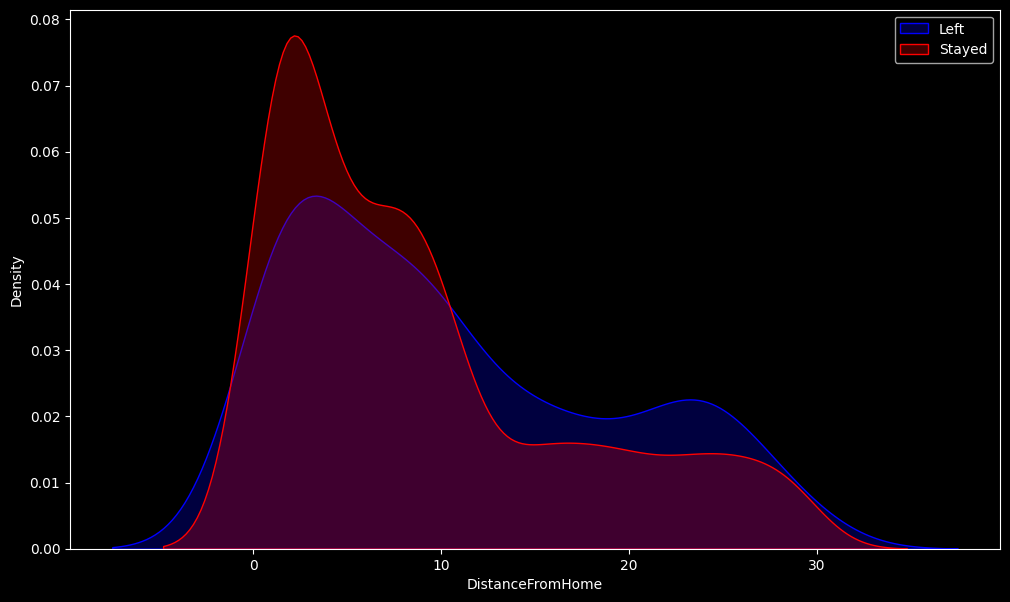

In [ ]:
# create a Kernel Density Estimate comparing 'Employees who left' and 'Employees who Stayed' using 'Distance From Home'
plt.figure(figsize=(12,7))
sns.kdeplot(data=left_df, x='DistanceFromHome', fill=True, label='Left', color='blue')
sns.kdeplot(data=stayed_df, x='DistanceFromHome', fill=True, label='Stayed', color='red')
plt.legend()
plt.show()

In [ ]:
display(stayed_df['DistanceFromHome'].describe())
display(left_df['DistanceFromHome'].describe())

,DistanceFromHome
count,1233.000000
mean,8.915653
std,8.012633
min,1.000000
25%,2.000000
50%,7.000000
75%,13.000000
max,29.000000


,DistanceFromHome
count,237.000000
mean,10.632911
std,8.452525
min,1.000000
25%,3.000000
50%,9.000000
75%,17.000000
max,29.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

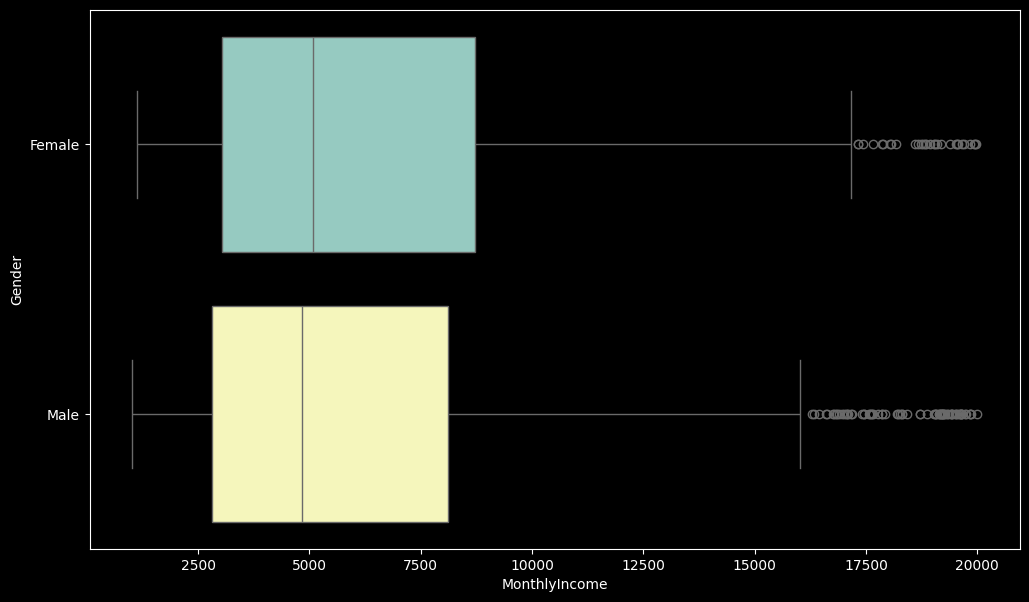

In [ ]:
# Let's see the Gender vs. Monthly Income using box plots
plt.figure(figsize=(12,7))
sns.boxplot(data=hrx, x='MonthlyIncome', y='Gender', hue='Gender')
plt.show()

### Interpetation:
1. median monthly salary male: 4500
1. median monthly salary female: 5000

## Task 4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [ ]:
#select object columns and find me unique labels and their count
hrx.select_dtypes(include=['object']).apply([pd.Series.unique, pd.Series.nunique], axis=0)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
unique,"[Travel_Rarely, Travel_Frequently, Non-Travel]","[Sales, Research & Development, Human Resources]","[Life Sciences, Other, Medical, Marketing, Tec...","[Female, Male]","[Sales Executive, Research Scientist, Laborato...","[Single, Married, Divorced]"
nunique,3,3,6,2,9,3


In [ ]:
# Convert the categorical fields into numerics using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
cat_cols = hrx.select_dtypes(include=['object']).columns
num_cols = hrx.select_dtypes(include=[np.number]).columns

num_cols = num_cols.drop('Attrition')
print(f"CATEGORICAL COLS: \n{cat_cols}", end='\n')
print(f"NUMERICAL COLS: \n{num_cols}")

CATEGORICAL COLS: 
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')
NUMERICAL COLS: 
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
# categorical one-hot encoding
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(hrx[cat_cols])
hrx_ohe = ohe.transform(hrx[cat_cols])
hrx_ohe.shape

(1470, 26)

In [ ]:
# select your features here i.e. drop the target 'Atrittion'
# scale your features data assigning it variable X
scaler = StandardScaler()
hrx_scale = scaler.fit_transform(hrx[num_cols])
hrx_scale.shape

(1470, 24)

In [ ]:
X = np.concatenate([hrx_scale, hrx_ohe], axis=1)
X.shape

(1470, 50)

In [ ]:
# select your dependent, target or response data as "Attrition" using variable y
y = hrx['Attrition'].copy()
y.shape

(1470,)

# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

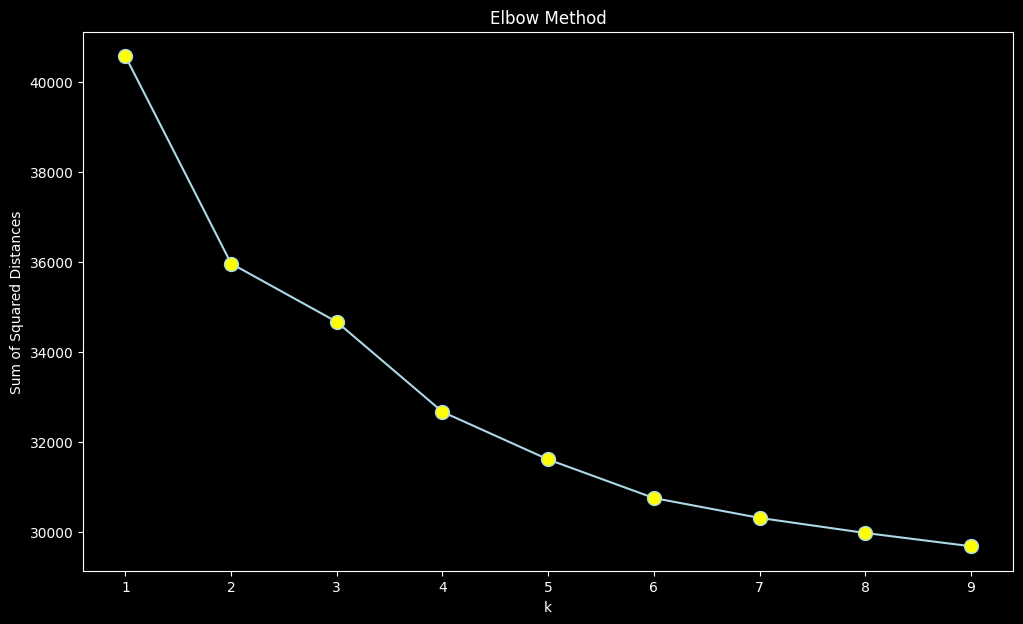

In [ ]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
# Create a visualization for Finding the right number of clusters - Elbow method'
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(12,7))
plt.plot(K, ssd, linestyle='-', color='lightblue', marker='o', markersize=10, markerfacecolor='yellow')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.grid(which='minor')
plt.show()

### Elbow
1. `n: 4`
1. Because the SSD (sum of square distance) starts decreasing slowing from here.

## APPLY K-MEANS METHOD

In [ ]:
n = 4 # optimal number of clusters
kmean = KMeans(n_clusters=n)
kmean.fit(X)

#Kmeans metrics
dash_line = '-' * 50
print(f"Cluster Centers: \n{kmean.cluster_centers_}")
print(dash_line)
print(f"Cluster Labels: \n{kmean.labels_}")
print(f"Inertia: \n{kmean.inertia_}")
print(dash_line)
# Check size of each cluster - Are they all representative ?
print(f"Cluster sizes: \n{pd.Series(kmean.labels_).value_counts()}")

Cluster Centers: 
[[ 7.25791330e-01  1.83713351e-01  1.37718863e-01  3.34305706e-01
   4.55240910e-02  5.64783810e-03  1.08516265e-01  3.95402677e-01
   3.35675119e-02  3.52194496e-01  2.00459397e-01  8.45343391e-01
   9.63836028e-02 -2.62461416e-01 -3.93323415e-01  9.05259116e-02
   7.47713099e-02  4.05068226e-01 -1.46677747e-02  1.03669447e-02
  -4.63556400e-01 -4.49996732e-01 -4.01876992e-01 -4.67113056e-01
   1.09792285e-01  1.57270030e-01  7.32937685e-01  4.45103858e-02
   6.32047478e-01  3.23442136e-01  2.07715134e-02  4.06528190e-01
   1.42433234e-01  3.08605341e-01  4.74777448e-02  7.41839763e-02
   4.27299703e-01  5.72700297e-01  1.60237389e-01  3.56083086e-02
   8.90207715e-02  8.01186944e-02  1.36498516e-01  8.90207715e-02
   1.15727003e-01  2.84866469e-01  8.90207715e-03  2.64094955e-01
   4.54005935e-01  2.81899110e-01]
 [-1.67540804e-01 -3.34926528e-03  7.59828547e-02 -8.70184946e-02
  -7.25550559e-02 -1.14712875e-02 -4.28079446e-02 -2.96588795e-01
  -1.22865114e-02 -3.04

## APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [ ]:
# Obtain the principal components
pca = PCA(n_components=2)

In [ ]:
# All samples projected on the two principal components
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(1470, 2)

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, (pca.n_components)+1)])
pca_df.head()

,PC1,PC2
0,-0.316452,-1.729126
1,0.556012,2.511097
2,-2.497061,-1.219441
3,-0.900276,-0.220355
4,-1.918041,-1.053884


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.Series(kmean.labels_, name='Cluster')], axis=1)
pca_df.head()

,PC1,PC2,Cluster
0,-0.316452,-1.729126,0
1,0.556012,2.511097,1
2,-2.497061,-1.219441,2
3,-0.900276,-0.220355,2
4,-1.918041,-1.053884,2


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


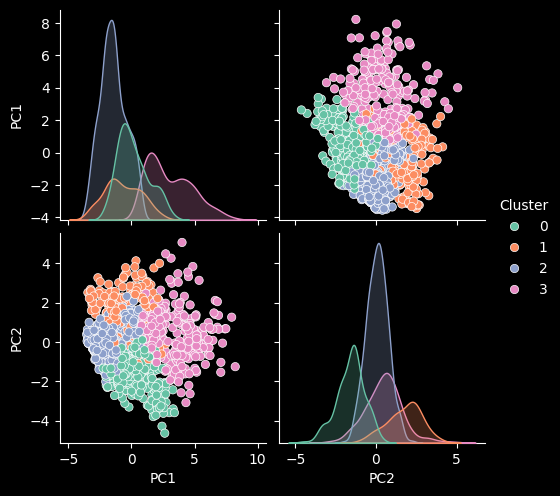

In [ ]:
# Create a scatterplot visual of Projection of the dataset on the 2 PCA dimensions'
sns.pairplot(data=pca_df, hue='Cluster', palette='Set2')
plt.show()

In [ ]:
# show the % of the total variance explained by each principal component. Overall close to 48% explained by these two.
print(f"component variance: {pca.explained_variance_ratio_}")
print(f"total variance: {pca.explained_variance_ratio_.sum():.2f}")

component variance: [0.1706538  0.06685351]
total variance: 0.24


## AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
#import the autoencoder libraries
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# create your autoencoder with all the features showing Encoder, bottleneck, decoder, autoencoder
latent_space_size = 2

autoencoder = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation='relu', kernel_initializer='he_uniform', name='encoder1'), #encoder
    Dense(32, activation='relu', kernel_initializer='he_uniform',name='encoder2'), #encoder
    Dense(latent_space_size, activation='relu', kernel_initializer='he_uniform', name='bottleneck'), #bottleneck
    Dense(32, activation='relu', kernel_initializer='he_uniform', name='decoder1'),  #decoder
    Dense(128, activation='relu', kernel_initializer='he_uniform', name='decoder2'), #decoder
    Dense(X.shape[1], activation='sigmoid', kernel_initializer='glorot_uniform', name='autoencoder')] #output
)

autoencoder.summary()

#compile
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder1 (Dense)                     │ (None, 128)                 │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder2 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck (Dense)                   │ (None, 2)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder1 (Dense)                     │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder2 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ autoencoder (Dense)                  │ (None, 50)                  │           6,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,492 (83.95 KB)

 Trainable params: 21,492 (83.95 KB)

 Non-trainable params: 0 (0.00 B)

#### Model build using Functional method - Extra

In [ ]:
## autoencoder using Functional method Definition
latent_space = 2
input_layer = Input(shape=(X.shape[1],))
encoder = Dense(128, activation='relu', kernel_initializer='he_uniform', name='encoder_1')(input_layer)
encoder = Dense(32, activation='relu', kernel_initializer='he_uniform', name='encoder_2')(encoder)
bottleneck = Dense(latent_space, activation='relu', kernel_initializer='he_uniform', name='bottleneck')(encoder)

decoder = Dense(32, activation='relu', kernel_initializer='he_uniform', name='decoder1')(bottleneck)
decoder = Dense(128, activation='relu', kernel_initializer='he_uniform', name='decoder2')(decoder)
output_layer = Dense(X.shape[1], activation='sigmoid', kernel_initializer='glorot_uniform')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_1 (Dense)                    │ (None, 128)                 │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_2 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_3 (Dense)                    │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck (Dense)                   │ (None, 2)                   │              34 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder1 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder2 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           6,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,820 (120.39 KB)

 Trainable params: 30,820 (120.39 KB)

 Non-trainable params: 0 (0.00 B)

### Training autoencoder

In [ ]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, X, test_size=0.2, random_state=42)

## Train autoencoder using input = output
model_history = autoencoder.fit(x=X_train, y=y_train, epochs=64, batch_size=256,
                                shuffle=True, validation_split=0.2, verbose=1)

Epoch 1/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.7730 - val_loss: 0.7312
Epoch 2/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7241 - val_loss: 0.7193
Epoch 3/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7098 - val_loss: 0.7008
Epoch 4/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6868 - val_loss: 0.6645
Epoch 5/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6560 - val_loss: 0.6194
Epoch 6/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6075 - val_loss: 0.5801
Epoch 7/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5754 - val_loss: 0.5598
Epoch 8/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5632 - val_loss: 0.5466
Epoch 9/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5433 - val_loss: 0.5375
Epoch 10/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5341 - val_loss: 0.5312
Epoch 11/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5318 - val_loss: 0.5251
Epoch 12/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5195 - val_loss: 0.5200
E

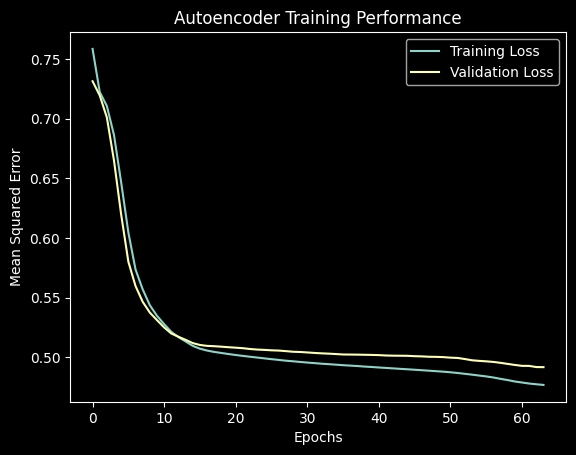

In [ ]:
# Plot the loss curve during training
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
# extract encoder part of autoencoder
encoder_layer = [autoencoder.get_layer(i) for i in ['encoder1', 'encoder2', 'bottleneck']]
encoder = Model(inputs=autoencoder.layers[0].input, outputs=encoder_layer[-1].output)
encoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder1 (Dense)                     │ (None, 128)                 │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder2 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck (Dense)                   │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,722 (41.88 KB)

 Trainable params: 10,722 (41.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Use Autoencoder to reduce the number of features / dimensions and show the dimensions
ae_X = encoder(X).numpy()
ae_X.shape

(1470, 2)

#### Compare with PCA vs Encoder reduction - Extra

In [ ]:
## Data is not scaled
ae_X_df = pd.DataFrame(data=ae_X)
ae_X_df.describe()

,0,1
count,1470.000000,1470.000000
mean,4.759820,2.592280
std,3.050551,1.559520
min,0.000000,0.000000
25%,2.324286,1.510077
50%,4.913083,2.411811
75%,6.968977,3.699528
max,12.622916,7.924272


In [ ]:
## !! pca dataset was Standard Scaled data
pd.DataFrame(pca_df).describe()

,PC1,PC2,Cluster
count,1.470000e+03,1.470000e+03,1470.000000
mean,2.416812e-18,1.220490e-16,1.629932
std,2.171227e+00,1.358969e+00,1.063883
min,-3.554615e+00,-4.627059e+00,0.000000
25%,-1.588721e+00,-8.394181e-01,1.000000
50%,-4.666976e-01,1.885544e-03,2.000000
75%,1.130663e+00,7.657201e-01,2.000000
max,8.218040e+00,5.067790e+00,3.000000


In [ ]:
## mse
scaler  = StandardScaler()
scale_pca_df = scaler.fit_transform(pca_df.iloc[:, :-1])
scale_ae_df = scaler.fit_transform(ae_X_df)

display(pd.DataFrame(scale_pca_df).describe())
display(pd.DataFrame(scale_ae_df).describe())

,0,1
count,1.470000e+03,1470.000000
mean,3.625218e-18,0.000000
std,1.000340e+00,1.000340
min,-1.637703e+00,-3.405990
25%,-7.319648e-01,-0.617898
50%,-2.150196e-01,0.001388
75%,5.209254e-01,0.563649
max,3.786263e+00,3.730414


,0,1
count,1.470000e+03,1.470000e+03
mean,5.190064e-09,-9.082613e-09
std,1.000340e+00,1.000340e+00
min,-1.560846e+00,-1.662796e+00
25%,-7.986634e-01,-6.941702e-01
50%,5.025801e-02,-1.157605e-01
75%,7.244295e-01,7.102347e-01
max,2.578476e+00,3.420161e+00


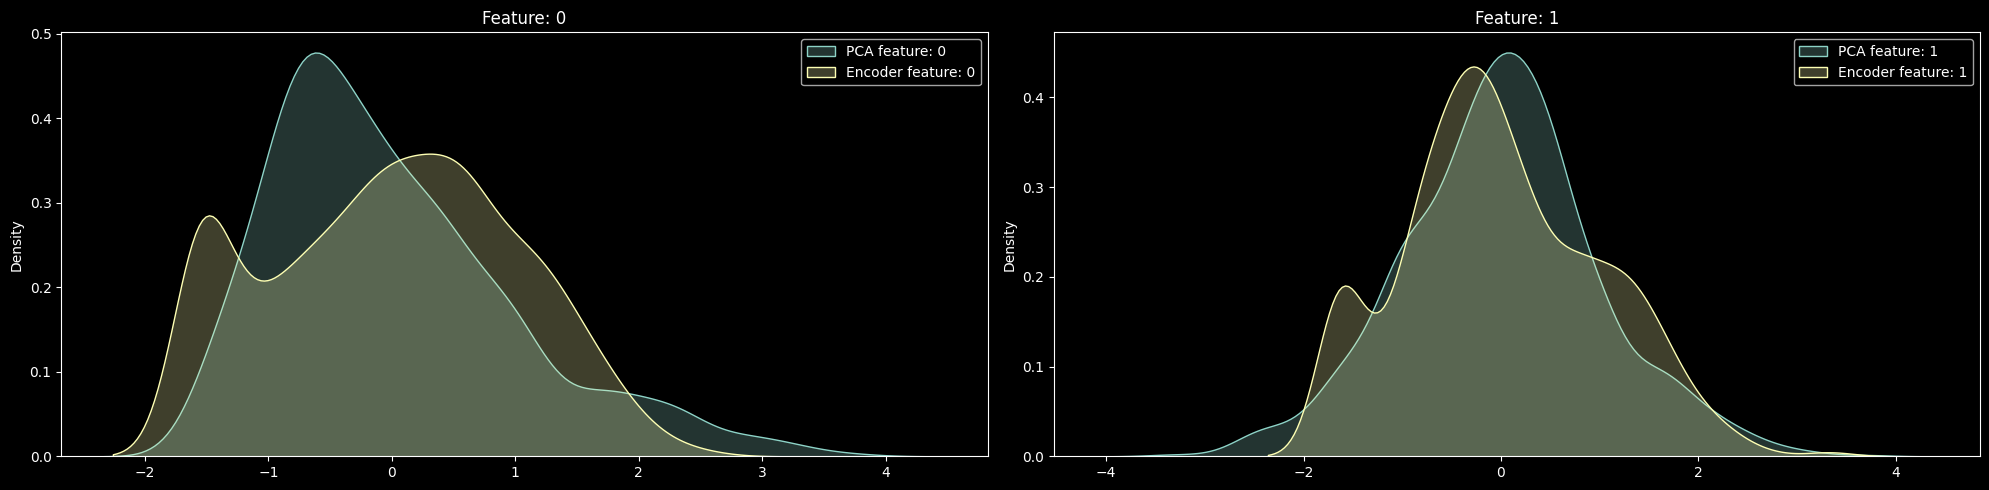

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
for i in range(2):
  sns.kdeplot(data=scale_pca_df[:, i], fill=True, ax=ax[i], label=f'PCA feature: {i}')
  sns.kdeplot(data=scale_ae_df[:, i], fill=True, ax=ax[i], label=f'Encoder feature: {i}')
  ax[i].legend()
  ax[i].set_title(f'Feature: {i}')

plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
### mse error bw reduced data from pca method - encoder method
mse = np.mean(np.power(scale_pca_df - scale_ae_df, 2), axis=0)
mse

array([3.65153109, 2.49359631])

### Apply KMEANS to encoded dataset

In [ ]:
## Standarizing encoding
scaler = StandardScaler()
ae_X = scaler.fit_transform(ae_X)

In [ ]:
# Apply KMEANS to encoded dataset here
ssd = []
for i in range(2, 10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(ae_X)
  ssd.append(kmeans.inertia_)

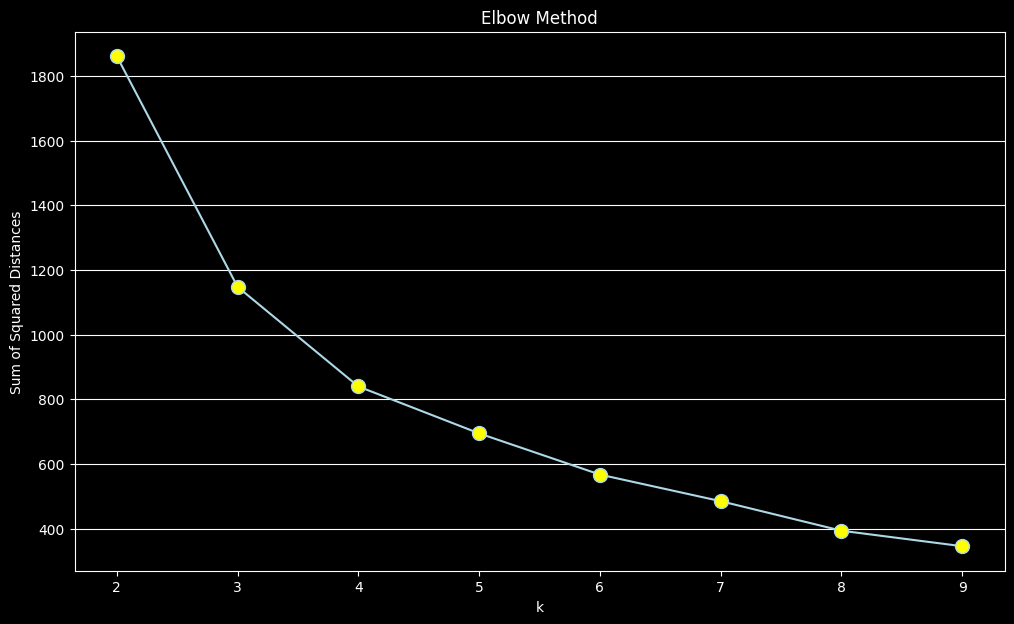

In [ ]:
# create a line plot to show the " Pick optimal number of clusters using Elbow method" of the unreduced and reduced dimension Kmeans features
plt.figure(figsize=(12,7))
plt.plot(range(2, 10), ssd, linestyle='-', color='lightblue', marker='o', markersize=10, markerfacecolor='yellow')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.grid(axis='y')
plt.show()

### Optimal `k: 4`

In [ ]:
## Apply the resulting optimal k to find new centroids
kmeans = KMeans(n_clusters=4)
kmeans.fit(ae_X)
print(f"Cluster Centers: \n{kmeans.cluster_centers_}")
print(dash_line)
print(f"Cluster Labels: \n{pd.Series(kmeans.labels_).value_counts()}")
print(dash_line)
print(f"Inertia: \n{kmeans.inertia_}")

Cluster Centers: 
[[-0.6755095  -1.0353448 ]
 [ 0.69014317  1.1742901 ]
 [-1.1127337   0.8478841 ]
 [ 0.837234   -0.3115345 ]]
--------------------------------------------------
Cluster Labels: 
3    495
0    405
2    298
1    272
Name: count, dtype: int64
--------------------------------------------------
Inertia: 
839.64404296875


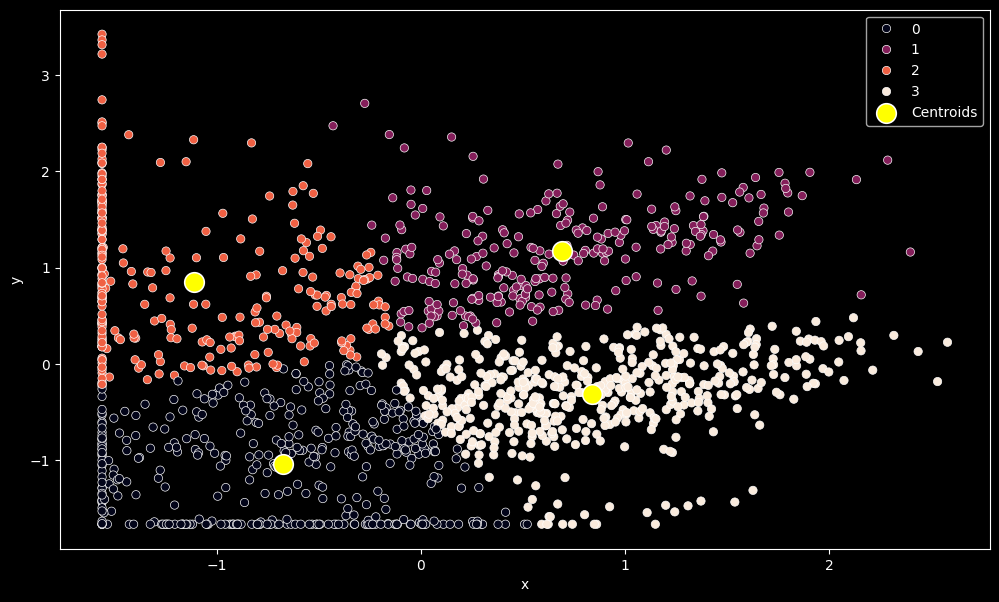

In [ ]:
## Show the centroids shape
plt.figure(figsize=(12,7))

# plot encoder data
sns.scatterplot(data=pd.DataFrame(ae_X, columns=['x', 'y']),
                x = 'x', y = 'y', hue=kmeans.labels_, palette='rocket')

# plot centroids
sns.scatterplot(data=pd.DataFrame(kmeans.cluster_centers_, columns=['x', 'y']),
                x = 'x', y = 'y', marker='o', s=200, color='Yellow', label='Centroids')

plt.legend()
plt.show()

In [ ]:
# show the clusters shape
kmeans.cluster_centers_.shape

(4, 2)

In [ ]:
# show the 'Number of samples" in your current consolidated
ae_X.shape[0]

1470

In [ ]:
## Apply PCA to encoded dataset
en_pca = PCA(n_components=2)
en_pca.fit(ae_X)
en_X_pca = en_pca.transform(ae_X)
en_X_pca.shape

(1470, 2)

In [ ]:
# concatenate the clusters to the data
ae_df = pd.concat([pd.DataFrame(en_X_pca), pd.Series(kmeans.labels_, name='Clusters')], axis=1)
ae_df.head()

,0,1,Clusters
0,0.915351,-0.096630,1
1,-1.905526,0.370970,0
2,1.284909,1.263466,3
3,-1.309819,0.456131,0
4,1.395947,0.884297,3


In [ ]:
## Apply PCA to encoded dataset
print("encoded PCA variance: ", en_pca.explained_variance_ratio_)
print("total variance: ", en_pca.explained_variance_ratio_.sum())

encoded PCA variance:  [0.54078597 0.459214  ]
total variance:  1.0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


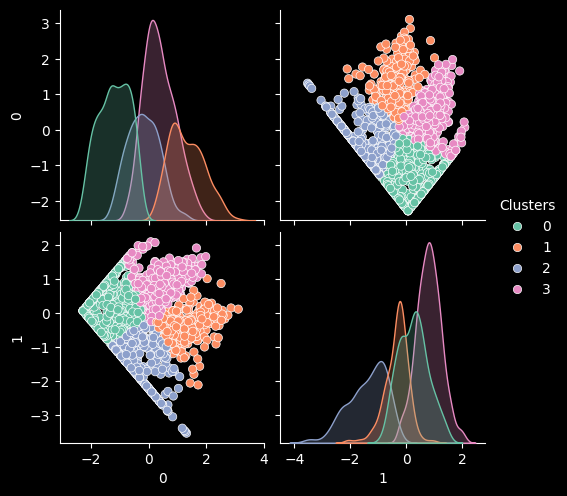

In [ ]:
## Plot your pca scatterplot with clusters as the hue
sns.pairplot(data=ae_df, hue='Clusters', palette='Set2')
plt.show()